In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [2]:
df = pd.read_csv('dulieu/Diabetespred.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(499, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.2 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.803607,121.354709,68.743487,20.57515,80.390782,31.984569,0.485377,33.086172,0.364729
std,3.345786,32.441489,19.452608,15.72019,119.774561,8.210358,0.345546,11.636849,0.481837
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.00000,0.000000,27.050000,0.252000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.00000,36.000000,32.000000,0.383000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.00000,122.000000,36.600000,0.633500,39.500000,1.000000
max,17.000000,197.000000,122.000000,63.00000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

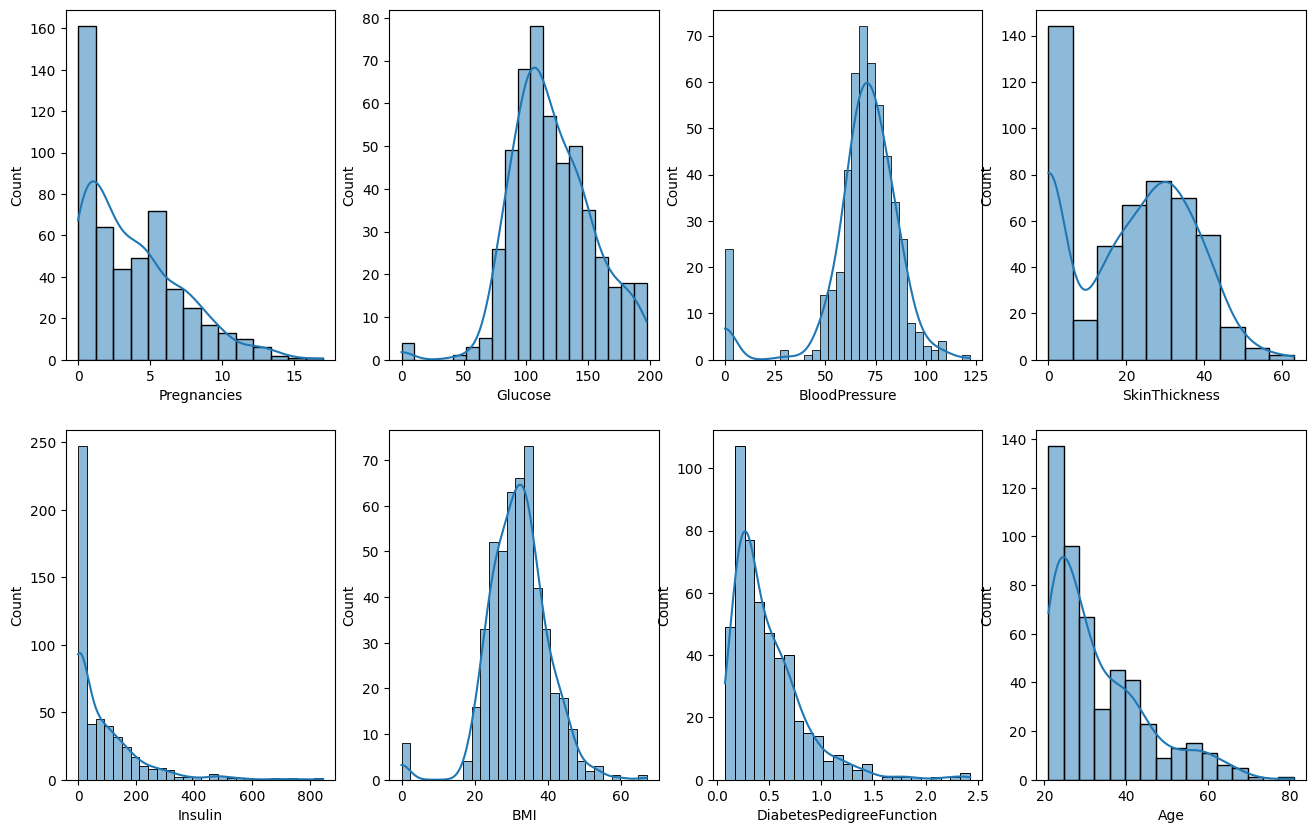

In [8]:
fig = plt.figure(figsize=(16,10))

col_name = df.columns[:-1]
for i in range(len(col_name)):
    colname = col_name[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.histplot(data=df, x=colname, kde=True)

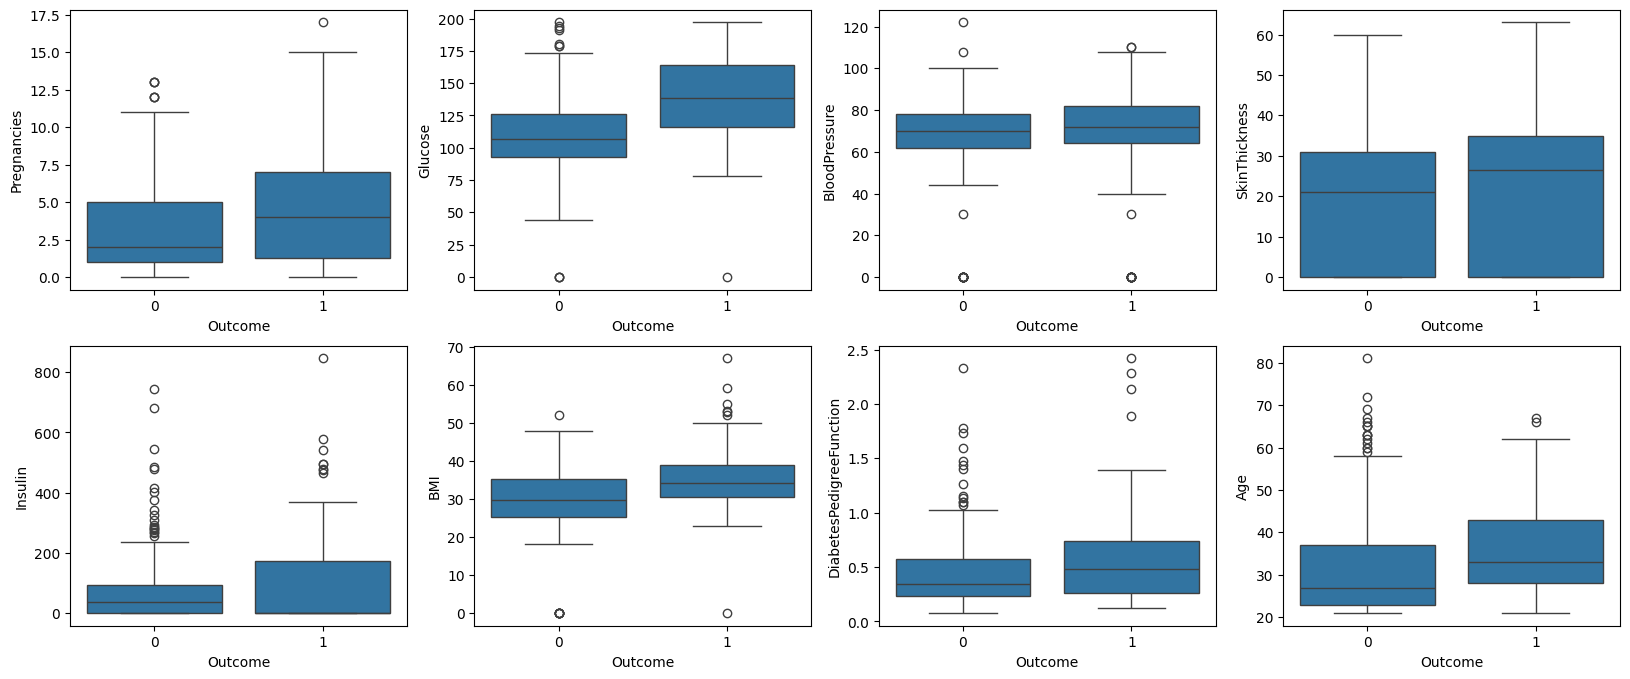

In [9]:
fig = plt.figure(figsize=(20,8))

for i in range(len(col_name)):
    colname = col_name[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.boxplot(data=df,y=colname, x="Outcome")

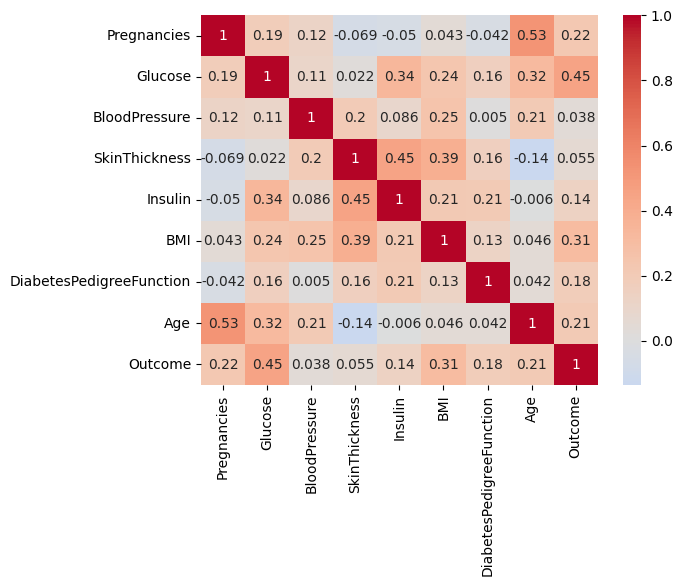

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()

Model: DecisionTreeClassifier, Scaller: StandardScaler
accurcy score: 0.72
confusion matrix:
 [[58  3]
 [25 14]]
roc: 0.6548970155527533
classification report:
               precision    recall  f1-score   support

           0       0.70      0.95      0.81        61
           1       0.82      0.36      0.50        39

    accuracy                           0.72       100
   macro avg       0.76      0.65      0.65       100
weighted avg       0.75      0.72      0.69       100

<class 'pandas.core.frame.DataFrame'>


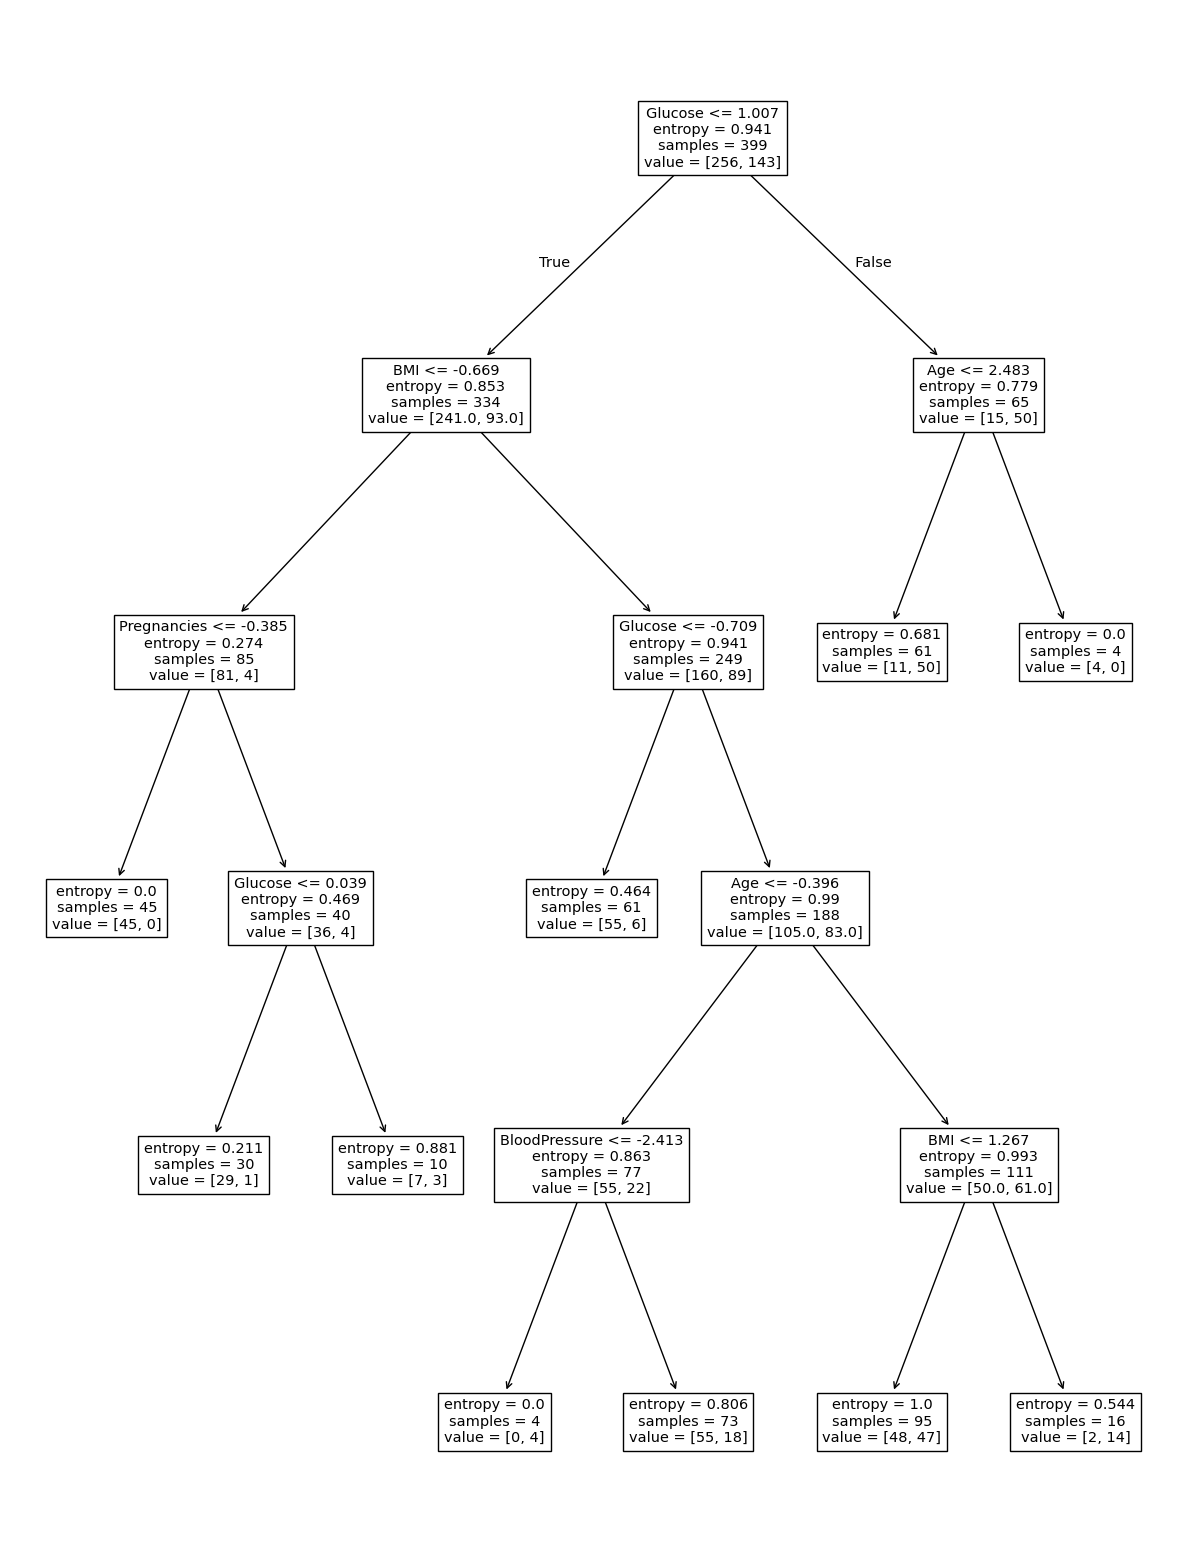

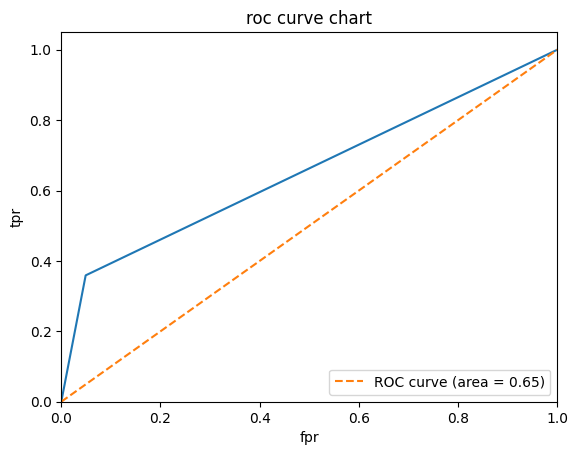

In [ ]:
from sklearn.tree import plot_tree

def run_model(df, scaller, model):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

    X_train_scaled = scaller.fit_transform(X_train)
    X_test_scaled = scaller.transform(X_test)

    model.fit(X_train_scaled, y_train)

    probs = model.predict_proba(X_test_scaled)
    # threshhold = 0.1
    # y_pred = (probs[:, 1] >= threshhold).astype(int)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    cfmx = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    fpr, tpr, threshholds = roc_curve(y_test, y_pred)

    print(f'Model: {model.__class__.__name__}, Scaller: {scaller.__class__.__name__}')
    print(f'accurcy score: {accuracy}')
    print(f'confusion matrix:\n {cfmx}')
    print(f'roc: {roc}')
    print(f'classification report:\n {class_report}')

    if model.__class__.__name__ == 'DecisionTreeClassifier':
        plt.figure(figsize=(15,20))
        feature_names = X_train.columns
        plot_tree(model, feature_names=feature_names)
        plt.show()

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--', label='ROC curve (area = %0.2f)' % roc)
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('roc curve chart')
    plt.legend(loc='lower right')
    plt.show()

# run_model(df, MinMaxScaler(), KNeighborsClassifier(n_neighbors=27))
# run_model(df, MaxAbsScaler(), KNeighborsClassifier(n_neighbors=27))
# run_model(df, StandardScaler(), KNeighborsClassifier(n_neighbors=27))

# run_model(df, MinMaxScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10))
# run_model(df, MaxAbsScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10))
run_model(df, StandardScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10))